# **ANAS MAJEED** (21011519-019)
# **BS CS VI - C**
# **Plant Disease Identification using CNN**

# Table of Contents
* [Introduction](#intro)

    * [Convolutional Layer](#cl)
    
    * [Pooling Layer](#pl)
    
    * [Fully-Connected Layer](#fcl)
    
* [CNNS and Computer Vision](#cnncv)

* [This Notebook](#tn)

* [Importing Libraries](#lib)

* [Configuring Notebook](#cn)

* [Exploring the Data](#exd)

* [Preprocessing](#pp)

* [Data Augmentation](#da)

* [Building the Convolutional Neural Network](#cnn)

* [Validating Performance](#vp)

* [Conclusion](#cnc)

# Introduction <a class="anchor" id="intro"></a>

<b><i>Convolutional Neural Networks (CNNs or ConvNets)</i></b> are specialized neural architectures that is predominantly used for several <b>computer vision</b> tasks, such as image classification and object recognition. These neural networks harness the power of <i>Linear Algebra</i>, specifically through convolution operations, to identify patterns within images.</p>

Convolutional neural networks have three main kinds of layers, which are:

• Convolutional layer

• Pooling layer

• Fully-connected layer

The convolutional layer is the first layer of the network, while the fully-connected layer is the final layer, responsible for the output. The first convolutional layer may be followed by several additional convolutional layers or pooling layers; and with each new layer, the more complex is the CNN.

As the CNN gets more complex, the more it excels in identifying greater portions of the image. Whereas earlier layers focus on the simple features, such as colors and edges; as the image progresses through the network, the CNN starts to recognize larger elements and shapes, until finally reaching its main goal.

The image below displays the structure of a CNN. We have an input image, followed by Convolutional and Pooling layers, where the feature learning process happens. Later on, we have the layers responsible for the task of classifying whether the vehicle in the input data is a car, truck, van, bicycle, etc.

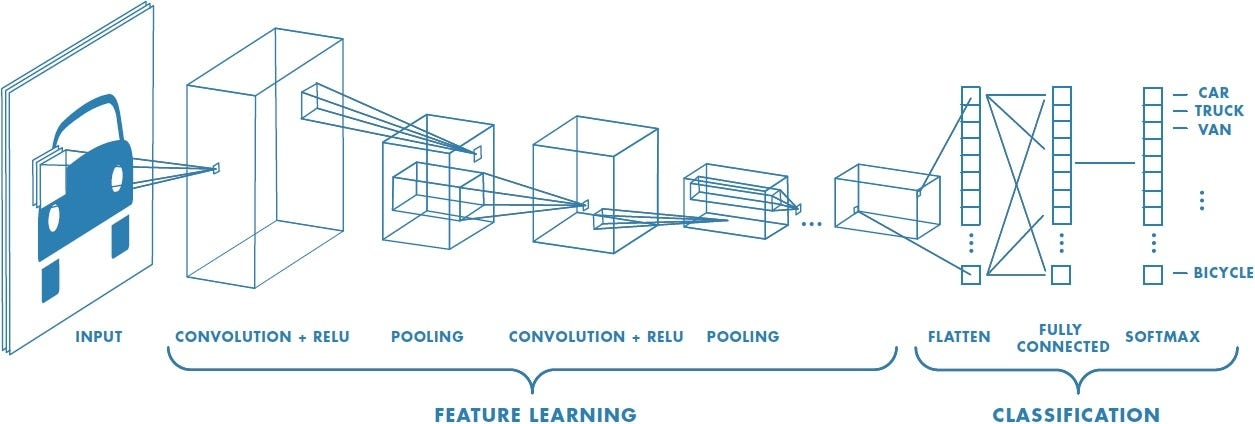

## Convolutional Layer <a class="anchor" id="cl"></a>

The convolutional layer is the most important layer of a CNN; responsible for dealing with the major computations. The convolutional layer includes <b>input data, a filter, and a feature map<b>.

To illustrate how it works, let's assume we have a color image as input. This image is made up of a matrix of pixels in 3D, representing the three dimensions of the image: height, width, and depth.

The filter—which is also referred to as kernel—is a two-dimensional array of weights, and is typically a $3\times3$ matrix. It is applied to a specific area of the image, and a <b>dot product<b> is computed between the input pixels and the weights in the filter. Subsequently, the filter shifts by a stride, and this whole process is repeated until the kernel slides through the entire image, resulting in an output array.

The resulting output array is also known as a feature map, activation map, or convolved feature.

<center>
    <img src = "https://miro.medium.com/v2/resize:fit:1358/1*D6iRfzDkz-sEzyjYoVZ73w.gif">
<p style = "font-size: 16px;
            font-family: 'Georgia', serif;
            text-align: center;
            margin-top: 10px;">GIF displaying the convolutional process. First, we have a $5\times5$ matrix—pixels in the input image—with a $3\times3$ filter. The result of the operation is the output array.<br> Source: <a href = "https://medium.datadriveninvestor.com/convolutional-neural-networks-3b241a5da51e">Convolutional Neural Networks</a></p>
</center>

It is important to note that the weights in the filter remain fixed as it moves across the image. The weights values are adjusted during the training process due to backpropagation and gradient descent.

Besides the weights in the filter, we have other three important parameters that need to be set before the training begins:

• <b>Number of Filters:</b> This parameter is responsible for defining the depth of the output. If we have three distinct filters, we have three different feature maps, creating a depth of three.

• <b>Stride:</b> This is the distance, or number of pixels, that the filter moves over the input matrix.

• <b>Zero-padding:</b> This parameter is usually used when the filters do not fit the input image. This sets all elements outside the input matrix to zero, producing a larger or equally sized output. There are three different kinds of padding:

■ <b>Valid padding:</b> Also known as no padding. In this specific case, the last convolution is dropped if the dimensions do not align.

■ <b>Same padding:</b> This padding ensures that the output layer has the exact same size as the input layer.

■ <b>Full padding:</b> This kind of padding increases the size of the output by adding zeros to the borders of the input matrix.

After each convolution operation, we have the application of a <b>Rectified Linear Unit (ReLU)</b> function, which transforms the feature map and introduces nonlinearity.

<center>
    <img src = "https://www.researchgate.net/profile/Leo-Pauly/publication/319235847/figure/fig3/AS:537056121634820@1505055565670/ReLU-activation-function.png">
<p style = "font-size: 16px;
            font-family: 'Georgia', serif;
            text-align: center;
            margin-top: 10px;"><i>ReLU</i> activation function:<br> $f(u)$ = $\begin{cases} 0 & \text{if } u \leq 0\\ u & \text{if } u > 0 \end{cases}$<br> <br>Source: <a href = "https://www.researchgate.net/figure/ReLU-activation-function_fig3_319235847">ResearchGate</a></p>
</center>

As mentioned earlier, the initial convolutional layer can be followed by additional convolutional layers.

The subsequent convolutional layers can see the pixels within the receptive fields of the prior layers, which helps to extract and interpret additional patterns.

## Pooling Layer <a class="anchor" id="pl"></a>

The pooling layer is responsible for reducing the dimensionality of the input. It also slides a filter across the entire input—without any weights—to populate the output array. We have two main types of pooling:

• <b>Max Pooling:</b> As the filter slides through the input, it selects the pixel with the highest value for the output array.

• <b>Average Pooling:</b> The value selected for the output is obtained by computing the average within the receptive field.

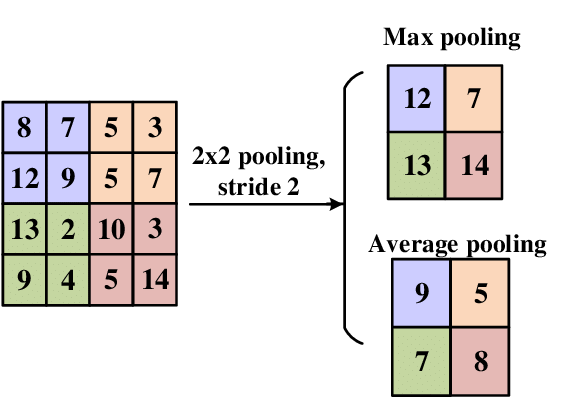

The pooling layer serves the purpose of reducing complexity, improving efficiency, and limiting the risk of overfitting.

## Fully-Connected Layer <a class="anchor" id="fcl"></a>

This is the layer responsible for performing the task classification based on the features extracted during the previous layers. While both convolutional and pooling layers tend to use $ReLU$ functions, fully-connected layers use the Softmax activation function for classification, producing a probability from 0 to 1.

<center>
    <img src = "https://www.researchgate.net/profile/Binghui-Chen/publication/319121953/figure/fig2/AS:527474636398592@1502771161390/Softmax-activation-function.png">
<p style = "font-size: 16px;
            font-family: 'Georgia', serif;
            text-align: center;
            margin-top: 10px;"><i>Softmax</i> activation function graph.<br>Source: <a href = "https://www.researchgate.net/figure/Softmax-activation-function_fig2_319121953">ResearchGate</a></p>
</center>

\begin{equation}
    \sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \
    \end{equation}</p>


Where:

-  $\sigma{(z_i)}$ = The softmax function applied to the $i^{th}$ element of the input vector. This value ranges between 0 and 1.</p>

-  $e^{z_i}$ = The exponential function applied to the $i^{th}$ element of the input vector.</p>

-  $\sum_{j=1}^K e^{z_{j}}$ = The sum of the exponential of each element in the input vector from to $K$, where $K$ is the total number of classes/labels.</p>

# CNN and Computer Visions <a class="anchor" id="cnncv"></a>

Due to its power in image recognition tasks, CNNs have been highly effective in many fields related to Computer Vision.

Computer Vision is a field of AI that enables computers to extract information from digital images, videos, and other visual inputs. Some common applications of computer vision today can be seen across several industries, including the following:

• <b>Social Media:</b> Google, Meta, and Apple use these systems to identify people in a photograph, making it easier to organize photo albums and tag friends.

• <b>Healthcare:</b> Computer vision models have been used to help doctors identifying cancerous tumors in patients, as well as other conditions.

• <b>Agriculture:</b> Drones equipped with cameras can monitor the health of vast farmlands to identify areas that need more water or fertilizers.

• <b>Security:</b> Surveillance systems can detect unusual and suspect activities in real time.

• <b>Finance:</b> Computer vision models may be used to identify relevant patterns in candlestick charts to predict price movements.

• <b>Automotive:</b> Computer vision is an essential component of the research leading to self-driving cars.

# This Notebook <a class="anchor" id="tn"></a>

Nowadays, there are several pre-trained CNNs available for many tasks. Models like <b><i>ResNet, VGG16, InceptionV3</i></b>, as well as many others, are highly efficient in most computer vision tasks we currently perform across industries.

In this notebook, however, I would like to explore the process of building a simple, yet effective, Convolutional Neural Network from scratch. For this task, I will use <b>Keras</b> to help us build a neural network that can accurately identify diseases in a plant through images.

I am going to use the <a href ="https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/">Plant Disease Recognition Dataset</a>, which contains 1,530 images divided into train, test, and validation sets. The images are labeled as “Healthy“, “Rust“, and “Powdery“ to describe the conditions of the plants.

Very briefly, each class means the following:

• <b>Rust:</b> These are plant diseases caused by Pucciniales fungi, which cause severe deformities to the plant.

• <b>Powdery:</b> Powdery mildews are caused by Erysphales fungi, posing a threat to agriculture and horticulture by reducing crop yields.

• <b>Healthy:</b> Naturally, these are the plants that are free from diseases.

# Importing Libraries <a class="anchor" id="lib"></a>

In [42]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

# Efficient Looping
import itertools

# Traceback for diagnosis
import traceback

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from PIL import Image
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest
import math

# Feature Selection
from sklearn.feature_selection import (
    RFECV, SelectKBest, chi2, f_classif, f_regression,
    mutual_info_classif, mutual_info_regression
)

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import (
    StratifiedKFold, KFold,
    RepeatedKFold, RepeatedStratifiedKFold,
    train_test_split, TimeSeriesSplit
)

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor,
    AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )


# ML classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier,
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier,ExtraTreesClassifier
    )
from sklearn.tree import DecisionTreeClassifier


# Clustering algorithms
from sklearn.cluster import KMeans

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# OS
import os

# Image package
from PIL import Image

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

### Importing KERAS

In [ ]:
# Importing Keras
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

# Configuring the Notebook <a class="anchor" id="cn"></a>

In [43]:
seed = 123
paper_color = '#EEF6FF'
bg_color = '#EEF6FF'

def image_resizer(paths):
    """
    This function resizes the input images
    """
    with ThreadPoolExecutor() as executor:
        resized_images = list(executor.map(lambda x: Image.open(x).resize((350,250)), paths))
    return resized_images

# Function to plot images
def plot_images_list(images, title, subtitle):
    '''
    This function helps to plot a matrix of images in a list
    '''
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f"{title}\n{subtitle}", fontsize=16)
    images = image_resizer(images)

    for ax, img in zip(axes.flat, images):
        ax.imshow(img)
        ax.axis('off')

    plt.show()


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
        print('\nGPU Found! Using GPU...')
    except RuntimeError as e:
        print(e)
        strategy = tf.distribute.get_strategy()
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)


GPU Found! Using GPU...


# Exploring the Data

Before building our Convolutional Neural Network, it is helpful to perform a brief, yet efficient, analysis of the data we have at hand. Let's start by loading the directories for each set.

In [ ]:
# Loading training, testing, and validation directories
train_dir = '/content/drive/MyDrive/Dataset 2/Train/Train'
test_dir = '/content/drive/MyDrive/Dataset 2/Test/Test'
val_dir = '/content/drive/MyDrive/Dataset 2/Validation/Validation'

We may also count the files inside each subfolder to compute the total of data we have for training and testing, as well as measure the degree of class imbalance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Giving names to each directory
directories = {
    train_dir: 'Train',
    test_dir: 'Test',
    val_dir: 'Validation'
    }

# Naming subfolders
subfolders = ['Healthy', 'Powdery', 'Rust']

print('\n* * * * * Number of files in each folder * * * * *\n')

# Counting the total of pictures inside each subfolder and directory
for dir, name in directories.items():
    total = 0
    for sub in subfolders:
        path = os.path.join(dir, sub)
        num_files = len([f for f in os.listdir(path) if os.path.join(path, f)])
        total += num_files
        print(f'\n{name}/{sub}: {num_files}')
    print(f'\n  Total: {total}')
    print("-" * 80)


* * * * * Number of files in each folder * * * * *


Train/Healthy: 458

Train/Powdery: 430

Train/Rust: 434

  Total: 1322
--------------------------------------------------------------------------------

Test/Healthy: 50

Test/Powdery: 50

Test/Rust: 50

  Total: 150
--------------------------------------------------------------------------------

Validation/Healthy: 20

Validation/Powdery: 20

Validation/Rust: 20

  Total: 60
--------------------------------------------------------------------------------


We have a total of **1,322 files** inside the ***Train*** directory and there are no large imbalances between classes. A small variation between them is fine, and a simple metric such as Accuracy may be enough to measure performance.

For the testing set, we have a total of **150** images, whereas the validation set consists of **60** images in total. Both sets have a perfect class balance.

Convolutional Neural Networks require a fixed size for all images we feed into it. This means that every single image in our dataset must be equally sized, either $128 \times 128$, $224 \times 224$, and so on.

We can also check if our data meets this requirement, or if it will be necessary to perform some preprocessing in this regard before modeling.

In [ ]:
unique_dimensions = set()

for dir, name in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                unique_dimensions.add(img.size)

if len(unique_dimensions) == 1:
    print(f"\nAll images have the same dimensions: {unique_dimensions.pop()}")
else:
    print(f"\nFound {len(unique_dimensions)} unique image dimensions: {unique_dimensions}")


Found 8 unique image dimensions: {(4032, 3024), (4000, 2672), (4000, 3000), (5184, 3456), (2592, 1728), (3901, 2607), (4608, 3456), (2421, 2279)}


We have 8 different dimensions across the dataset. In the next cell, I am going to check the distribution of these dimensions across the data.

In [ ]:
# Checking if all the images in the dataset have the same dimensions
dims_counts = defaultdict(int)

for dir, name in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                dims_counts[img.size] += 1

for dimension, count in dims_counts.items():
    print(f"\nDimension {dimension}: {count} images")


Dimension (4000, 2672): 1130 images

Dimension (4000, 3000): 88 images

Dimension (2421, 2279): 1 images

Dimension (5184, 3456): 97 images

Dimension (2592, 1728): 127 images

Dimension (4608, 3456): 72 images

Dimension (4032, 3024): 16 images

Dimension (3901, 2607): 1 images


It seems that most images have dimensions of $4000 \times 2672$, which is a **rectangular shape**. We can conclude that, due to the differences in dimensions, we will need to apply some preprocessing to the data.

First, we are going to resize the images, so they all have the same shape. Then, we will transform the input from rectangular shape to **square shape**.

Another crucial consideration is verifying the pixel valye range of the images. In this case, all images should have pixel values spanning from **0 to 255**. This consistency simplifies the preprocessing step, since we often normalize pixel values in images to a range going from **0 to 1**.

In [ ]:
# Checking images dtype
all_uint8 = True
all_in_range = True

for dir, name in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                img_array = np.array(img)

            if img_array.dtype == 'uint8':
                all_uint8 = False

            if img_array.min() < 0 or img_array.max() > 255:
                all_in_range = False

if all_uint8:
    print(" - All images are of data type uint8\n")
else:
    print(" - Not all images are of data type uint8\n")

if all_in_range:
    print(" - All images have pixel values ranging from 0 to 255")
else:
    print(" - Not all images have the same pixel values from 0 to 255")

 - Not all images are of data type uint8

 - All images have pixel values ranging from 0 to 255


Even though not all images are of the same data type, `uint8`, it is fairly easy to guarantee that they will have the same data type once we load images into datasets. We confirmed, though, that all the images have pixel values ranging from 0 to 255, which is great news.

Before moving on to the *Preprocessing step*, let's plot some images from each class to see what they look like.

In [44]:
# Loading the directory for each class in the training dataset
train_healthy_dir = train_dir + "/" + 'Healthy'
train_rust_dir = train_dir + "/" + 'Rust'
train_powdery_dir = train_dir + "/" + 'Powdery'

# Selecting 9 random pictures from each directory
healthy_files = random.sample(os.listdir(train_healthy_dir), 9)
rust_files = random.sample(os.listdir(train_rust_dir), 9)
powdery_files = random.sample(os.listdir(train_powdery_dir), 9)

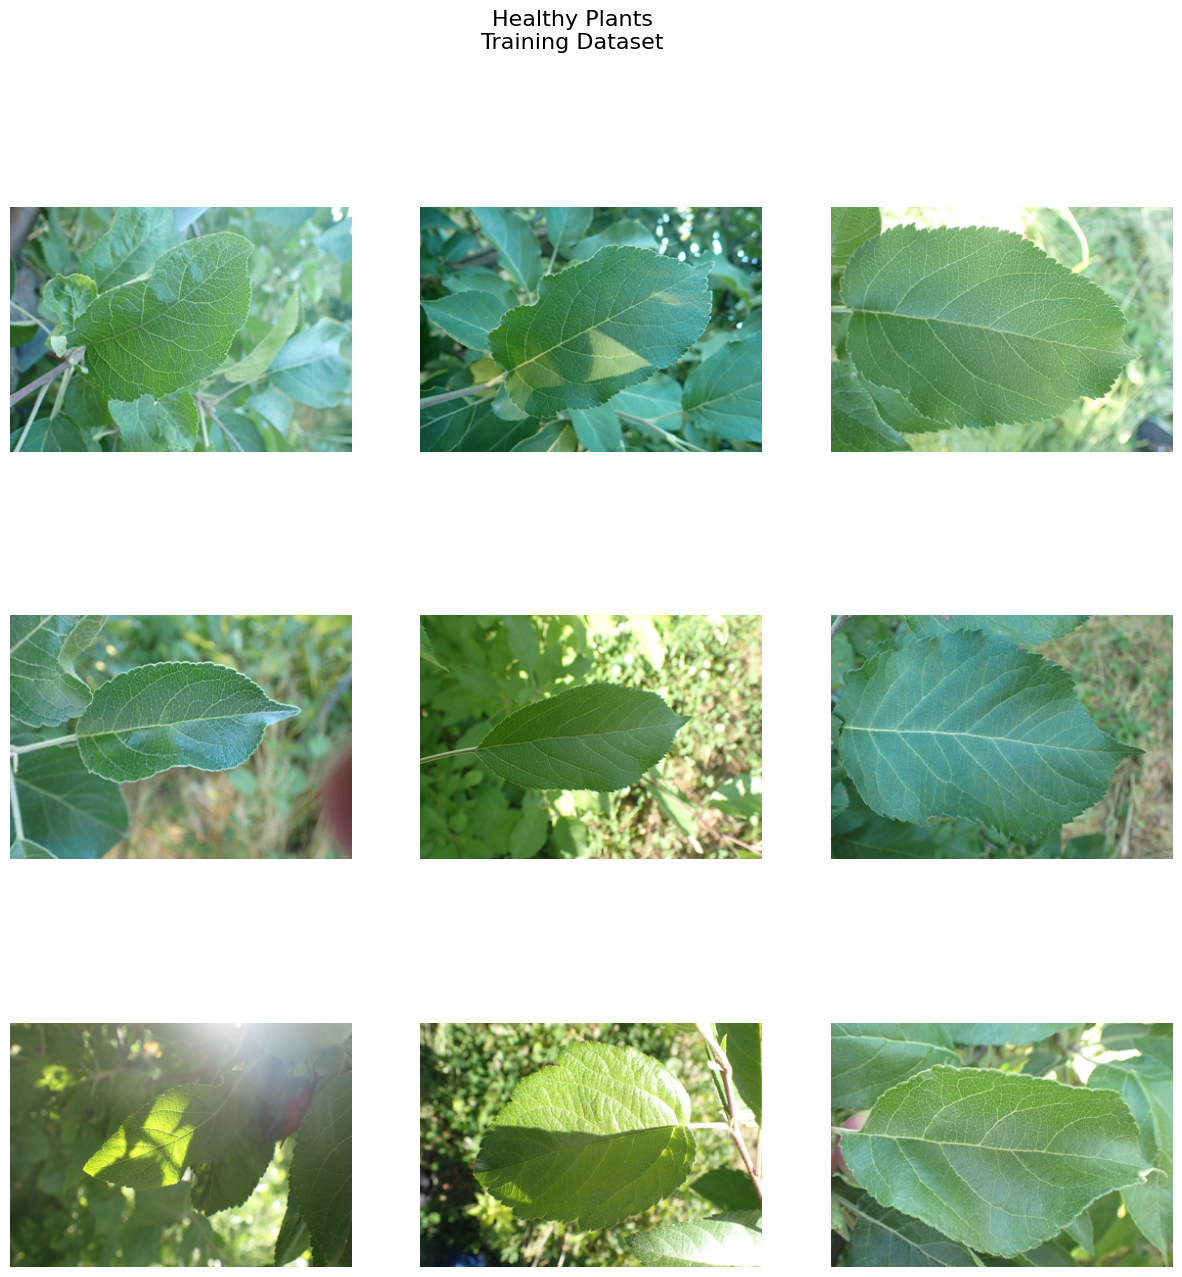

In [45]:

# Plotting healthy plants
healthy_images = [os.path.join(train_healthy_dir, f) for f in healthy_files]
plot_images_list(healthy_images, "Healthy Plants", "Training Dataset")

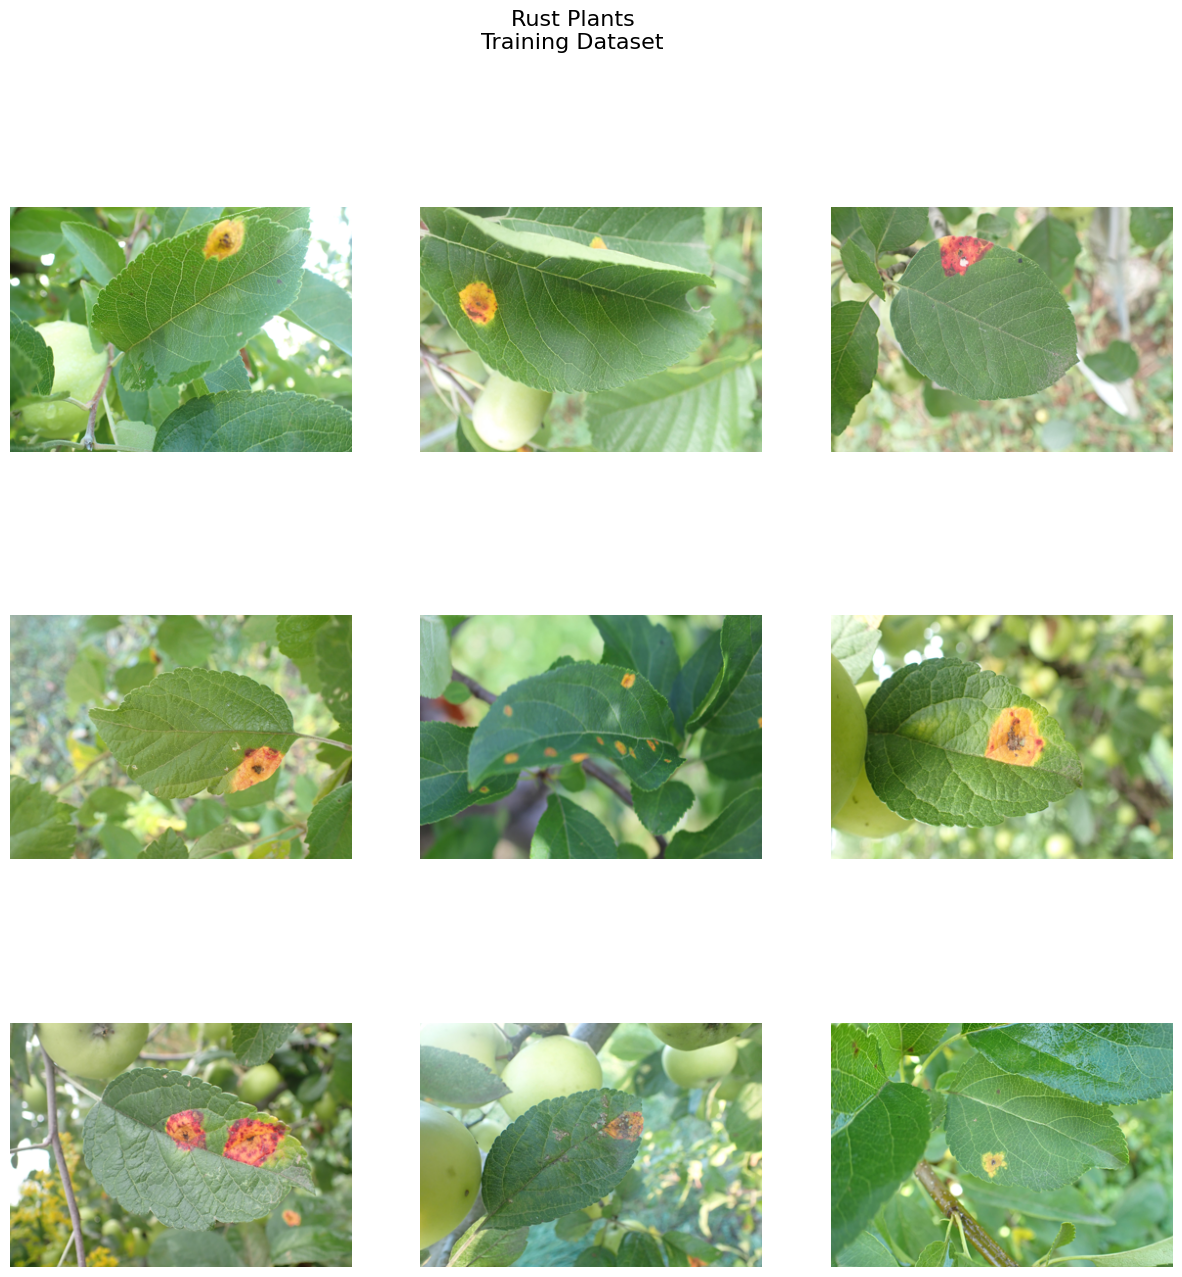

In [46]:
# Plotting rust plants
rust_images = [os.path.join(train_rust_dir, f) for f in rust_files]
plot_images_list(rust_images, "Rust Plants", "Training Dataset")

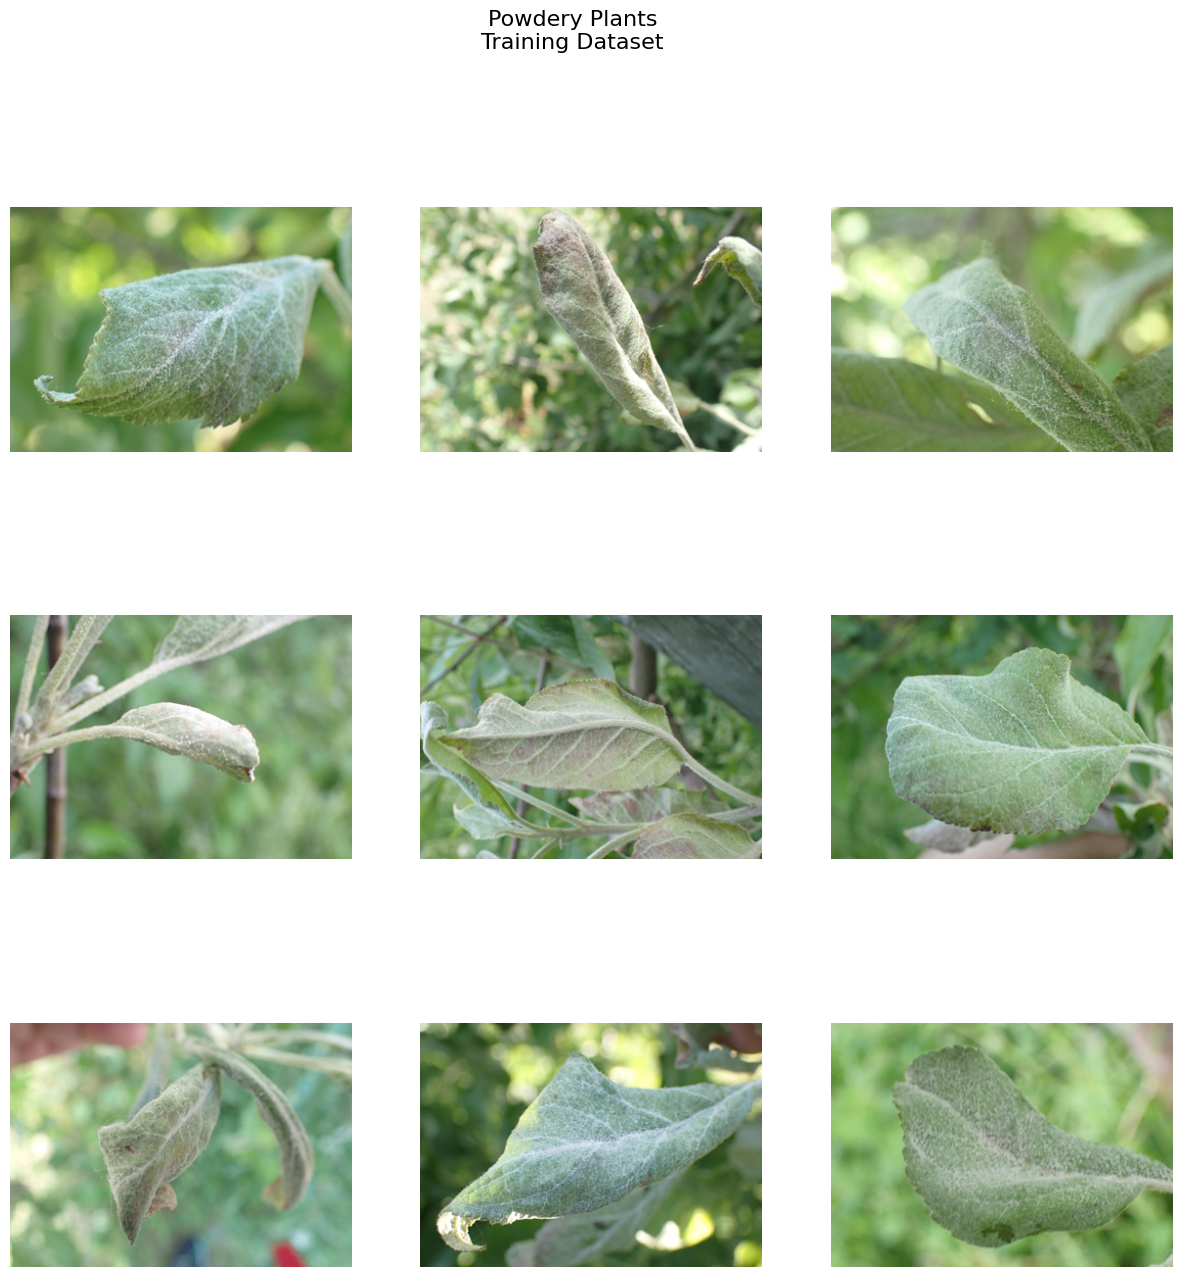

In [47]:
# Plotting powdery plants
powdery_images = [os.path.join(train_powdery_dir, f) for f in powdery_files]
plot_images_list(powdery_images, "Powdery Plants", "Training Dataset")

#Preprocessing <a class="anchor" id="pp"></a>

For those familiar with tabular data, preprocessing is probably one of the most daunting steps of dealing with neural networks and unstructured data.

This task can be fairly easy by using TensorFlow's <code>image_dataset_from_directory</code>, which loads images from the directories as a <b>TensorFlow Dataset</b>. This resulting dataset can be manipulated for batching, shuffling, augmentating, and several other preprocessing steps.
          
I suggest you check <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory">this link</a> for more information on the <code>image_dataset_from_directory</code> function.

In [ ]:
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 1322 files belonging to 3 classes.


In [ ]:
# Creating a dataset for the Test data
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 150 files belonging to 3 classes.


In [ ]:
# Creating a dataset for the Test data
validation = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 60 files belonging to 3 classes.


We have successfully captured all files within each set for each of the three classes. We can also print these datasets for a further understanding of their structure.

In [ ]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)
print('\nValidation Dataset:', validation)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


Let's explore a bit deeper what all the information above means.
    
<b>• _BatchDataset:</b> It indicates that the dataset returns data in batches.
    
<b>• element_spec:</b> This describes the structure of the elements in the dataset.

<b>• TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name = None):</b> This represents the features, in this case the images, in the dataset. <code>None</code> represents the batch size, which is <i>None</i> here because it can vary depending on how many samples we have in the last batch; <code>256, 256</code> represents the height and width of the images; <code>3</code> is the number of channels in the images, indicating they are RGB images. Last, <code>dtype=tf.float32</code> tells us that the data type of the image pixels is a 32-bit floating point.
    
<b>• TensorSpec(shape=(None, 3), dtype=tf.float32, name=None):</b> This represents the labels/targets of our dataset. Here, <code>None</code> refers to the batch size; <code>3</code> refers to the number of labels in the dataset; whilst <code>dtype=tf.float32</code> is also a 32-bit floating point.
By using the <code>image_dataset_from_directory</code> function, we have been able to automatically preprocess some aspects of the data. For instance, all the images are now of the same data type, <code>tf.float32</code>. By setting <code>image_size = (256, 256)</code>, we have ensured that all images have the same dimensions, $256 \times 256$.

Another important step for preprocessing is ensuring that the pixel values of our images are within a 0 to 1 range. The <code>image_dataset_from_directory</code> method performed some transformations already, but the pixel values are still in the 0 to 255 range.

In [ ]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 255.0


To bring the pixel values to the 0 to 1 range, we can easily use one of Keras' preprocessing layers, <code>tf.keras.layers.Rescaling</code>.

In [ ]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1

In [ ]:
# Rescaling datasets
train = train.map(lambda x, y: (scaler(x), y))
test = test.map(lambda x, y: (scaler(x), y))
validation = validation.map(lambda x, y: (scaler(x), y))

Now we can once more visualize the minimum and maximum pixel values in the validation set.

In [ ]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


    
<b>• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_crop#randomcrop-class">tf.keras.layers.RandomCrop</a></b>: This layer randomly chooses a location to crop images down to a target size.
    
• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip/">tf.keras.layers.RandomFlip</a></b>: This layer randomly flips images horizontally and or vertically based on the <code>mode</code> attribute.
    
<b>• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_translation/">tf.keras.layers.RandomTranslation</a></b>: This layer randomly applies translations to each image during training according to the <code>fill_mode</code> attribute.
    
<b>• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_brightness/">tf.keras.layers.RandomBrightness</a></b>: This layer randomly increases/reduces the brightness for the input RGB images.
    
<b>• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation/">tf.keras.layers.RandomRotation</a></b>: This layer randomly rotates the images during training, and also fills empty spaces according to the <code>fill_mode</code> attribute.
    
<b>• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom/">tf.keras.layers.RandomZoom</a></b>: This layer randomly zooms in or out on each axis of each image independently during training.
    
• <a href ="https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_contrast/">tf.keras.layers.RandomContrast</a></b>: This layer randomly adjusts contrast by a random factor during training in or out on each axis of each image independently during training.

For this task, I am going to apply <code>RandomRotation</code>, <code>RandomContrast</code>, as well as <code>RandomBrightness</code> to our images.

In [ ]:
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),


        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),

        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

We can also use an <code>input_shape</code> as example to build the pipeline above and plot it below to illustrate how it looks.

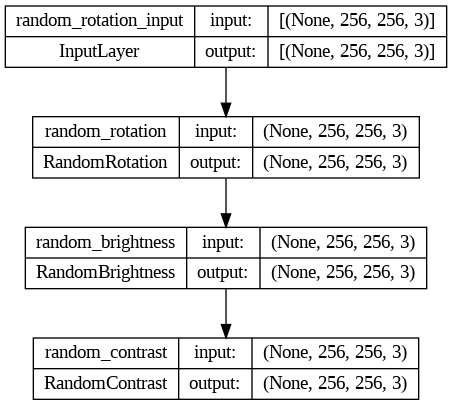

In [ ]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True)

We are going to attach this data augmentation pipeline to our convolutional neural network. It is important to remember that the data augmentation pipeline is inactive during testing, and the input samples will only be augmented during <code>fit()</code>, not when calling <code>predict()</code>.

# Building the Convolutional Neural Network <a class="anchor" id="cnn"></a>

To build the **Convolutional Neural Network** with Keras, we are going to use the Sequential class. This class allows us to build a linear stack of layers, which is essential for the creation of neural networks.

Besides the Convolutional, Pooling, and Fully-Connected Layers, which we have previously explored, I am also going to add the following layers to the network:

• **BatchNormalization**: This layer applies a transformation that maintains the mean output close to $0$ and the standard deviation close to $1$. It normalizes its inputs and is important to help convergence and generalization.

• **Dropout**: This layer randomly sets a fraction of input units to $0$ during training, which helps to prevent overfitting.

• **Flatten**: This layer transforms a multi-dimensional tensor into a one-dimensional tensor. It is used when transitioning from the Feature Learning segment — Convolutional and Pooling layers — to the fully-connected layers.

I plan to use different kernel sizes, both $3 \times 3$ and $5 \times 5$. This may allow the network to capture features at multiple scales.

I am also gradually increasing the dropout rates as we advance through the process and the increase in the number of kernels.

With that being said, let's go ahead and build our ConvNet.

In [ ]:
# Initiating model on GPU
with strategy.scope():
    model = Sequential()

    model.add(augmentation) # Adding data augmentation pipeline to the model

    # Feature Learning Layers
    model.add(Conv2D(32,                  # Number of filters/Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input.
                    input_shape = (256,256,3) # Input image shape
                    ))
    model.add(Activation('relu'))# Activation function
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(512, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    # Flattening tensors
    model.add(Flatten())

    # Fully-Connected Layers
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(3, activation = 'softmax')) # Classification layer

    
 <b>• optimizer</b>: In this parameter, we define the algorithms to adjust the weight updates. This is an important parameter, because choosing the right optimizer is essential to speed convergence. We are going to use <code>RMSprop</code>, which is the best optimizer I've found during the tests I ran.
    
   <b>• loss</b>: This is the loss function we're trying to minimize during training. In this case, we are using <code>categorical_crossentropy</code>, which is a good choice for classification tasks with over two classes.

   <b>• metrics</b>: This parameter defines the metric that will be used to evaluate performance during training and validation. Since our data is not heavily unbalanced, we may use <code>accuracy</code> for this, which is a very straightforward metric given by the following formula:
    <p style="font-family: Calibri, serif; text-align: left;font-size: 24px; letter-spacing: .85px;">
    \begin{equation}
    \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
    \end{equation}
    </p>    


In [ ]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

After compiling the model, I am going to define an **Early Stopping** and a **Model Checkpoint**.

***Early Stopping*** serves the purpose of interrupting the training process when a certain metric stops improving over a period of time. In this case, I am going to configure the EarlyStopping method to monitor the accuracy in the test set, and stop the training process if we don't have any improvement on it after 5 epochs.

***Model Checkpoint*** will ensure that only the best weights get saved, and we're also going to define the best weights according to the accuracy of the model in the test set.

In [ ]:
# Defining an Early Stopping and Model Checkpoints
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint('best_model.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)

We may now use <code>model.fit()</code> to start the training and testing process

In [ ]:
# Training and Testing Model
try:
    history = model.fit(
        train, epochs = 50,
        validation_data = test,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

Epoch 1/50
83/83 [==============================] - 84s 757ms/step - loss: 5.5107 - accuracy: 0.5242 - val_loss: 9.4873 - val_accuracy: 0.3333
Epoch 2/50
83/83 [==============================] - 70s 745ms/step - loss: 2.6266 - accuracy: 0.6044 - val_loss: 9.3485 - val_accuracy: 0.3333
Epoch 3/50
83/83 [==============================] - 71s 773ms/step - loss: 1.7173 - accuracy: 0.6687 - val_loss: 6.1621 - val_accuracy: 0.3333
Epoch 4/50
83/83 [==============================] - 73s 818ms/step - loss: 1.1700 - accuracy: 0.7156 - val_loss: 1.1241 - val_accuracy: 0.6133
Epoch 5/50
83/83 [==============================] - 70s 779ms/step - loss: 0.9803 - accuracy: 0.7300 - val_loss: 3.9617 - val_accuracy: 0.5600
Epoch 6/50
83/83 [==============================] - 70s 787ms/step - loss: 0.7391 - accuracy: 0.7753 - val_loss: 7.9041 - val_accuracy: 0.3733
Epoch 7/50
83/83 [==============================] - 64s 717ms/step - loss: 0.6781 - accuracy: 0.8222 - val_loss: 2.7206 - val_accuracy: 0.5800

The highest accuracy for the testing set has been reached at the **19th epoch at 0.9200**, or **92%**, and didn't improve after that.

With the `history` object, we can plot two lineplots showing both the loss function and accuracy for both sets over epochs.

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Dummy history data for example purposes
history = {
    'loss': np.random.rand(10),
    'val_loss': np.random.rand(10),
    'accuracy': np.random.rand(10),
    'val_accuracy': np.random.rand(10)
}

# Creating subplot
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['<b>Loss Over Epochs</b>', '<b>Accuracy Over Epochs</b>'],
                    horizontal_spacing=0.2)

# Loss over epochs
train_loss = go.Scatter(x=list(range(len(history['loss']))),
                        y=history['loss'],
                        mode='lines',
                        line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                        name='Training',
                        showlegend=False)

val_loss = go.Scatter(x=list(range(len(history['val_loss']))),
                      y=history['val_loss'],
                      mode='lines',
                      line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                      name='Test',
                      showlegend=False)

fig.add_trace(train_loss, row=1, col=1)
fig.add_trace(val_loss, row=1, col=1)

# Accuracy over epochs
train_acc = go.Scatter(x=list(range(len(history['accuracy']))),
                       y=history['accuracy'],
                       mode='lines',
                       line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                       name='Training',
                       showlegend=True)

val_acc = go.Scatter(x=list(range(len(history['val_accuracy']))),
                     y=history['val_accuracy'],
                     mode='lines',
                     line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                     name='Test',
                     showlegend=True)

fig.add_trace(train_acc, row=1, col=2)
fig.add_trace(val_acc, row=1, col=2)

# Updating layout
fig.update_layout(
    title={'text': '<b>Loss and Accuracy Over Epochs</b>', 'x': 0.025, 'xanchor': 'left'},
    margin=dict(t=100),
    height=500,
    width=1000,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)

# Show figure using Plotly in Google Colab
import plotly.io as pio
pio.renderers.default = 'colab'  # Ensure the renderer is set to 'colab'

fig.show()


It is possible to see that the loss of the training set decreases continuously over epochs, whereas its accuracy increases. This happens because, at each epoch, the model starts to become more and more aware of the training set's patterns and particularities.

For the test set, however, this process is a bit more slower. Overall, the lowest loss for the test set happened at epoch 14 at 0.5319, while the accuracy was at its peak at epoch 19, at 0.9200.

Now that our model is built, trained, and tested, we can also plot its architecture, as well as summary to better understand it.

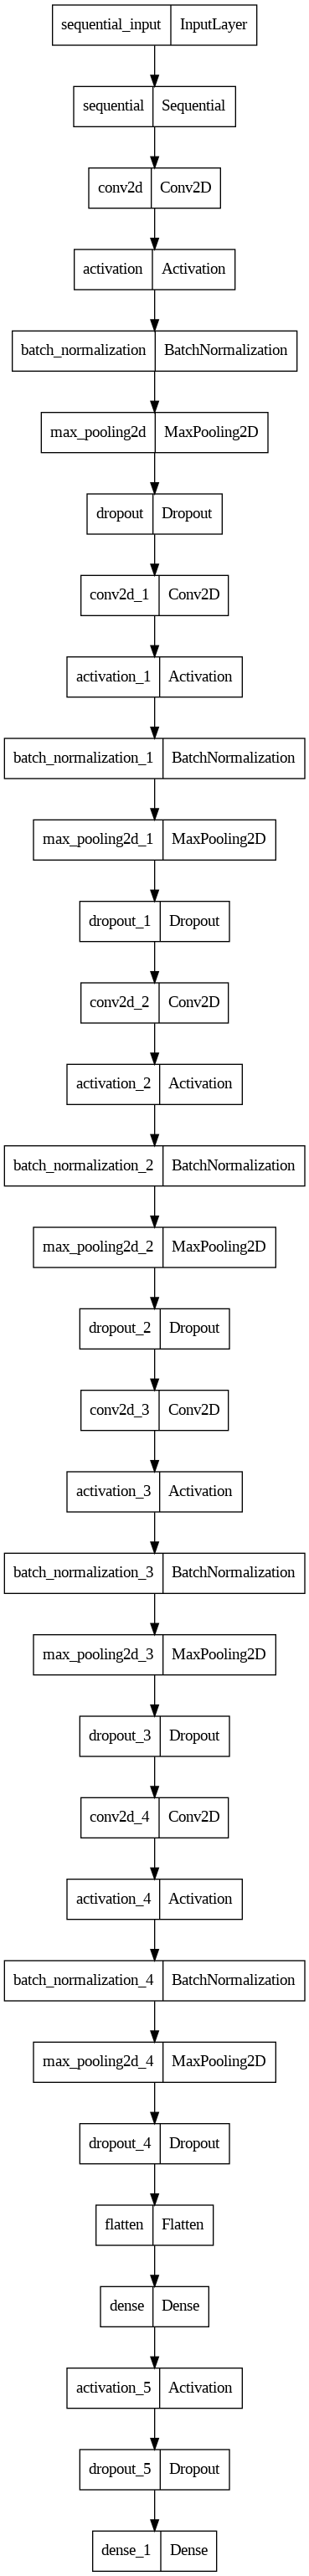

In [ ]:
tf.keras.utils.plot_model(model) # Plotting model

In the image, it is possible to visualize the sequential process of the Convolutional Neural Network. First we have a 2D Convolutional Layer, with **ReLU activation function**, followed by a BatchNormalization Layer and then a MaxPooling 2D Layer. Finally, we have a Dropout Layer to avoid overfitting. This same pattern repeats a few times until we reach the Flatten Layer, which connects the output of the Feature Learning process to the Dense Layers for the final classification task.

Using `model.summary()`, we can extract some extra info on the neural network.

In [ ]:
model.summary() # Printing model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)     

The summary displays the output shapes for each layer, as well as the number of parameters. We can clearly see, for instance, that the output shape for the first layer is `(None, 256,256,3)` where $256$ represents both height and width, while $3$ represents the RGB color. In the last dense layer, however, the output shape is `(None, 3)`, where $3$ represents the three classes for classification.

We can also see that the model has over 69 million parameters, where 99.99% of them are trainable. The non-trainable parameters are the ones from the BatchNormalization layers.

# Validating Performance <a class="anchor" id="vp"></a>

After finishing the training and testing phase, we may go ahead and validate our model on the validation set. To load the best weights achieved during training, we simply use the `load_weights` method. These weights will be saved with the same name we've given during the `ModelCheckpoint` configuration, when we set `ModelCheckpoint('best_model.h5')`

In [ ]:
# Loading best weights
model.load_weights('best_model.h5')

In [ ]:
preds = model.predict(validation)  # Running model on the validation dataset
val_loss, val_acc = model.evaluate(validation) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

4/4 [==============================] - 3s 24ms/step - loss: 0.4739 - accuracy: 0.9667

Validation Loss:  0.47385257482528687

Validation Accuracy:  97.0 %


The output for `model.predict()` consists of probabilities for each class, while `model.evaluate()` returns loss and accuracy values.

It is clear that the model correctly predicts  $ 97 $% of the labels of the images in the validation set.

I am going to load some images from the validation test and run predictions on them individually, so we can see how the model performs according to each picture.

Picture of a Powdery Plant: 



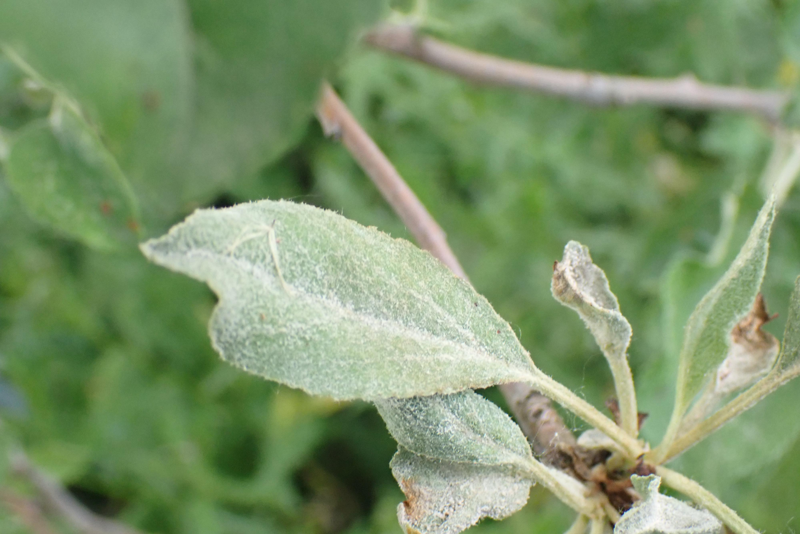

In [ ]:
# Loading an image from the Validation/ Powdery directory
image_path = '/content/drive/MyDrive/Dataset 2/Validation/Validation/Powdery/9b6a318cc5721d73.jpg'
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Powdery Plant: \n')
resized_img

In [ ]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = ['Healthy', 'Powdery', 'Rust']

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 [==============================] - 1s 716ms/step

Predicted Class: Powdery

Confidence Score: 0.9997759461402893


The model is about $99.9$% confident that the plant in the picture belongs to the **Powdery class**, which is correct.

Picture of a Rust Plant: 



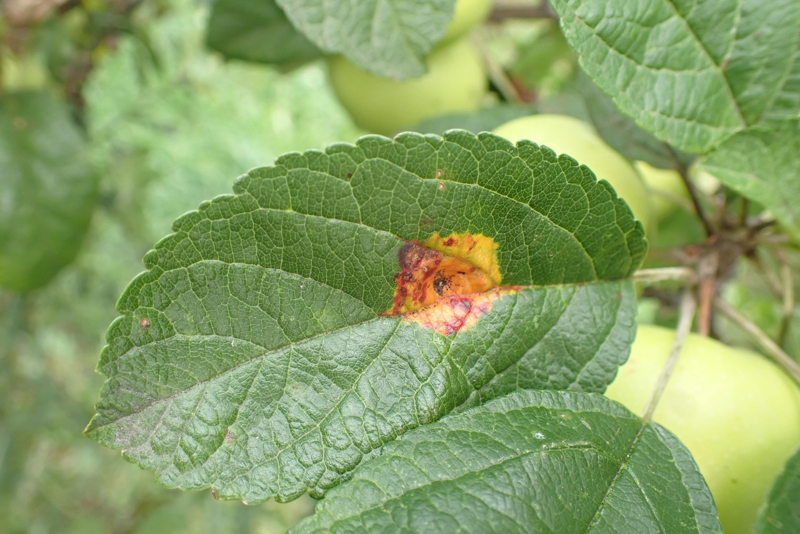

In [ ]:
# Loading an image from the Validation/ Rust directory
image_path = '/content/drive/MyDrive/Dataset 2/Validation/Validation/Rust/8152cfbd5a28b5d2.jpg'
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Rust Plant: \n')
resized_img

In [ ]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = ['Healthy', 'Powdery', 'Rust']

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 [==============================] - 0s 69ms/step

Predicted Class: Rust

Confidence Score: 1.0


The model is about $100$% confident that the plant in the picture belongs to the **Rust class**, which is correct.

Picture of a Healthy Plant: 



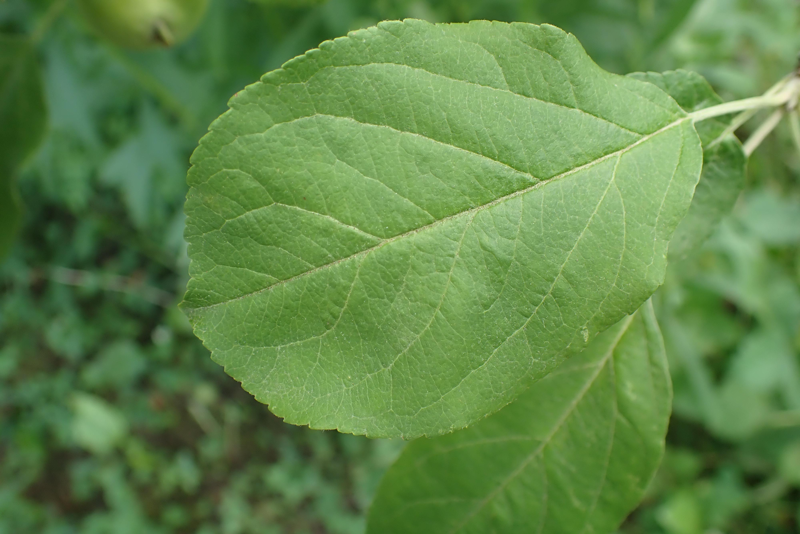

In [ ]:
# Loading an image from the Validation/ Healthy directory
image_path = '/content/drive/MyDrive/Dataset 2/Validation/Validation/Healthy/9c99786a63786571.jpg'
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Healthy Plant: \n')
resized_img

In [ ]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = ['Healthy', 'Powdery', 'Rust']

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 [==============================] - 0s 74ms/step

Predicted Class: Healthy

Confidence Score: 0.9999998807907104


The model is about $100$% confident that the plant in the picture belongs to the **Healthy class**, which is correct.

After running several tests with other pictures, I could identify that the current model is performing fairly well in classifying all the three classes.

#Conclusion <a class="anchor" id="cnc"></a>

n this notebook, we explored the basics of Convolutional Neural Networks. We delved deeper into the main layers — Convolutional, Pooling, etc. —, activation functions, as well as many other techniques to work with image data and CNNs for image classification.

Even though many tasks nowadays can be efficiently done with pre-trained models, that can be easily accessible via platforms such as TensorFlow Hub and HuggingFace, it is still essential to understand what is the role of each layer inside a Convolutional Neural Network and how they interact with each other. This is why this notebook have the intention of guiding you through the process of building a CNN from scratch, and I plan to bring more notebooks such as this one for other Deep Learning tasks and architectures.

Our model scored 97.0% in accuracy while predicting labels for the validation dataset, which is a great performance, and it was competent to identify relevant patterns across all the classes in the dataset.

I hope that this notebook serves as an introduction to those that are still just starting to explore ConvNets, or even help veterans to refine their knowledge on some of the basics. Please, feel free to copy this notebook and edit it as you wish, specially to try your own improvements for higher performance and testings.